<a href="https://colab.research.google.com/github/RozitaAbdoli/credit_default_mining/blob/main/FS_correlations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install necessary packages and import relevant libraries
import pandas as pd
import seaborn as sns

In [ ]:
#Import Drive API and authenticate
from google.colab import drive
#Mount Drive to the Colab VM
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Load the dataset into pandas DataFrame
df = pd.read_csv("/content/drive/MyDrive/Capstone_project/v2_credit_default.csv")

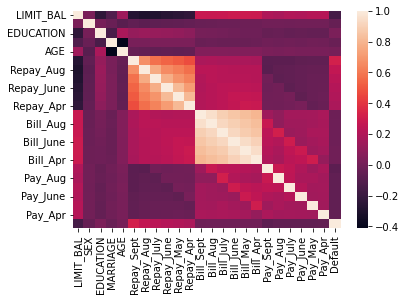

In [ ]:
#Heat map of the (pearson) correlations between all variables
corr_matrix = df.corr()
sns.heatmap(corr_matrix);
#insights:
# Bill_ amount for different months are highly correlated
# Repay_ for different months are highly correlated
# Overall customers seem to have similar bill amounts and repay_ habits months after months

# Correlation with the class attribute "Default"

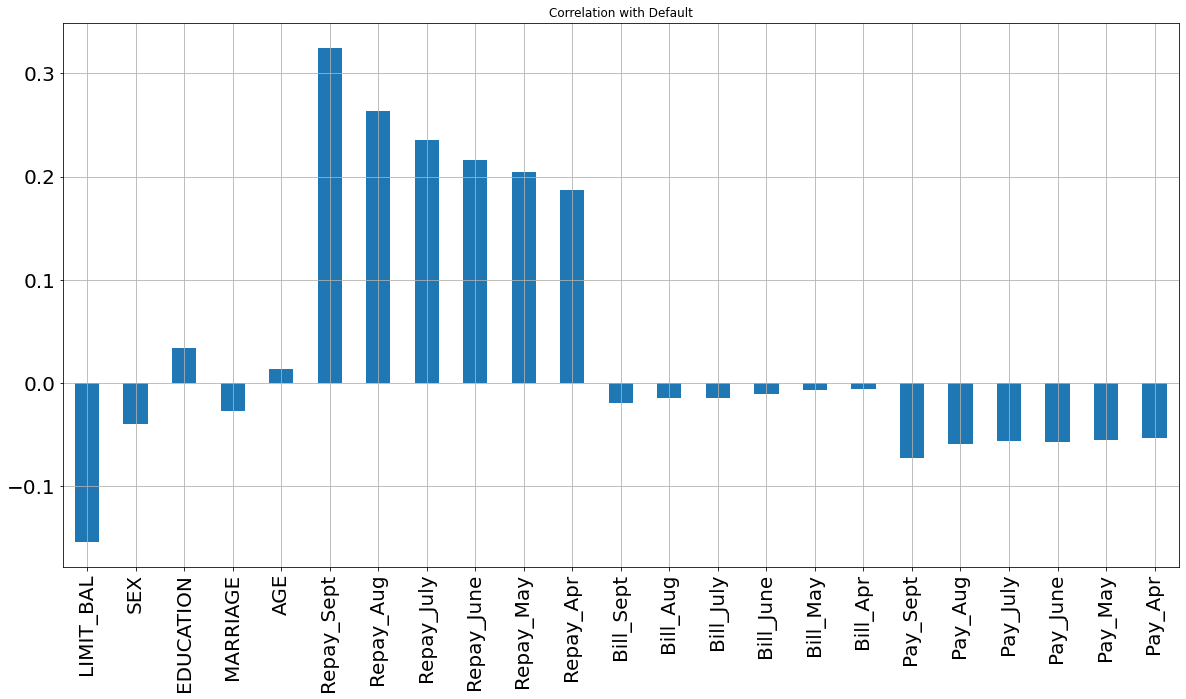

In [ ]:
# First, visualize the correlation
df_x = df.drop(['Default'],axis=1)
corr = df_x.corrwith(df['Default'])
corr.plot.bar(figsize = (20, 10), title = "Correlation with Default", fontsize = 20, rot = 90, grid = True)
# Insights: Customers that repayed late seem to be more likely to default
# Customers given more balance limit by the bank seem less likely to default
# The more of the bill the customers payed the previous months, seem the less likely to default (but this is a weak correlation)

In [ ]:
# Now calculate the numeric values for the pearson correlation, and rank. As a test, correlation of Default with itself is 1. 
# Make a list of the attributes. leave Default in as a check (Deafult's correlation with itself should be 1)
corr_list = list(df.columns)
# In a for loop calculate the correlation between each attribute and Default
l=[]
for i in corr_list:
  s=[i, df[i].corr(df['Default'], method='pearson')]
  l.append(s)
# Take the absolute values of the correlations, as we only care about the magnitude of the correlation
l_pos =[]
for i in l:
 i = [[i[0],abs (i[1])]]
 l_pos = l_pos + i
 #Sort the correlations in descending order (from most correlated to least)
l_pos_sorted = sorted(l_pos, key=lambda x: x[1], reverse=True)
for k in l_pos_sorted:
  print(k)
  # Insight: Top 7 most correlated predictors with the class attribute are the Repay_ status in the last 6 months, and the balance limit of the customer's account.

['Default', 1.0]
['Repay_Sept', 0.3249637596767926]
['Repay_Aug', 0.2636562313110018]
['Repay_July', 0.23523047917113907]
['Repay_June', 0.21655085455746415]
['Repay_May', 0.2040591287539345]
['Repay_Apr', 0.18673962498767838]
['LIMIT_BAL', 0.15387103923584186]
['Pay_Sept', 0.07301487306669893]
['Pay_Aug', 0.05864338192569073]
['Pay_June', 0.05689817884175311]
['Pay_July', 0.05631938749451024]
['Pay_May', 0.055194253060265104]
['Pay_Apr', 0.05325020918365988]
['SEX', 0.03974164282427612]
['EDUCATION', 0.03386151891389182]
['MARRIAGE', 0.027258776263673155]
['Bill_Sept', 0.019757561189393535]
['Bill_Aug', 0.014301695285761657]
['Bill_July', 0.014181945965626002]
['AGE', 0.01361935111609442]
['Bill_June', 0.010259209493695673]
['Bill_May', 0.006859294776426955]
['Bill_Apr', 0.0054686373405989745]


In [ ]:
# Similar to above but now calculate Spearman's rank correlation coefficients

# Make a list of the attributes. leave Default in as a check (Deafult's correlation with itself should be 1)
corr_list = list(df.columns)
# In a for loop calculate the correlation between each attribute and Default
l=[]
for i in corr_list:
  s=[i, df[i].corr(df['Default'], method='spearman')]
  l.append(s)
# Take the absolute values of the correlations, as we only care about the magnitude of the correlation
l_pos =[]
for i in l:
 i = [[i[0],abs (i[1])]]
 l_pos = l_pos + i
 #Sort the correlations in descending order (from most correlated to least)
l_pos_sorted = sorted(l_pos, key=lambda x: x[1], reverse=True)
for k in l_pos_sorted:
  print(k)

['Default', 1.0]
['Repay_Sept', 0.2922890288960366]
['Repay_Aug', 0.21703428279373982]
['Repay_July', 0.19482404926929714]
['Repay_June', 0.1736998571509932]
['LIMIT_BAL', 0.16982082056735717]
['Pay_Sept', 0.1608762773675027]
['Repay_May', 0.1590235519785045]
['Pay_Aug', 0.15135618566780026]
['Repay_Apr', 0.14246682673212485]
['Pay_July', 0.13972623364439504]
['Pay_June', 0.12828809351181678]
['Pay_Apr', 0.12174495141325181]
['Pay_May', 0.11688474705046804]
['EDUCATION', 0.04344813807476621]
['SEX', 0.03974164282427619]
['MARRIAGE', 0.02837326214397729]
['Bill_Sept', 0.025598291613017955]
['Bill_Aug', 0.01580264903230413]
['Bill_July', 0.012909073484816548]
['Bill_June', 0.008584884742349913]
['Bill_May', 0.007066331466243635]
['AGE', 0.004825874560429935]
['Bill_Apr', 0.00027871148013815515]
